In [23]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt 
plt.rc("font", size=14)

import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

data = pd.read_csv('data/after_feature_adjust_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41185 entries, 0 to 41184
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               41185 non-null  int64  
 1   job               41185 non-null  object 
 2   marital           41185 non-null  object 
 3   education         41185 non-null  object 
 4   default           41185 non-null  object 
 5   housing           41185 non-null  object 
 6   loan              41185 non-null  object 
 7   contact           41185 non-null  object 
 8   month             41185 non-null  object 
 9   day_of_week       41185 non-null  object 
 10  campaign          41185 non-null  int64  
 11  contacted_before  41185 non-null  int64  
 12  previous          41185 non-null  int64  
 13  poutcome          41185 non-null  object 
 14  emp.var.rate      41185 non-null  float64
 15  cons.price.idx    41185 non-null  int64  
 16  cons.conf.idx     41185 non-null  int64 

In [24]:
def separate_variables(df):
    numeric_vars = df.select_dtypes(include=['float64', 'int64'])
    categorical_vars = df.select_dtypes(include=['object'])
    return numeric_vars, categorical_vars

numeric_df, categorical_df = separate_variables(data)

def plot_boxplot(data, column, y):
    plt.figure(figsize=(8, 6))  
    sns.boxplot(x=y, y=column, data=data) 
    plt.title(f'Boxplot of {column} by {y}', fontsize=14)  
    plt.xlabel(y, fontsize=12)  
    plt.ylabel(column, fontsize=12)  
    plt.xticks(fontsize=10)  
    plt.yticks(fontsize=10) 
    plt.show()

def plot_histogram(data, column, y):
    plt.figure(figsize=(8, 6)) 
    sns.countplot(x=column,hue=y, data=data) 
    plt.title(f'Histogram of {column} by {y}', fontsize=14)  
    plt.xlabel(column, fontsize=12) 
    plt.ylabel('Frequency', fontsize=12)  
    plt.xticks(rotation='vertical',fontsize=10)  
    plt.yticks(fontsize=10)  
    plt.show()

def plot_data(data, y):
    for column in data.columns:
        if data[column].dtype == 'object':
            plot_histogram(data, column, y)
        else:
            plot_boxplot(data, column, y)


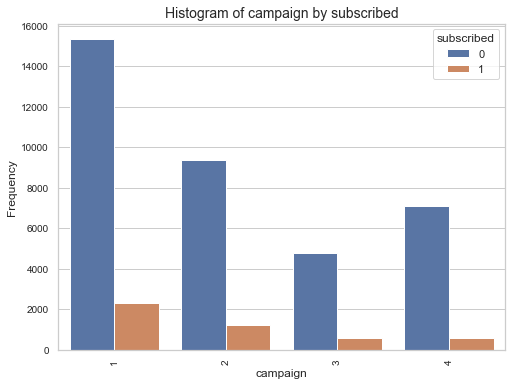

In [25]:
plot_histogram(data,'campaign','subscribed')

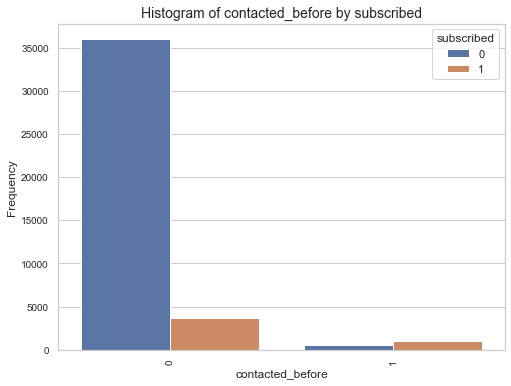

In [26]:

plot_histogram(data,'contacted_before','subscribed')

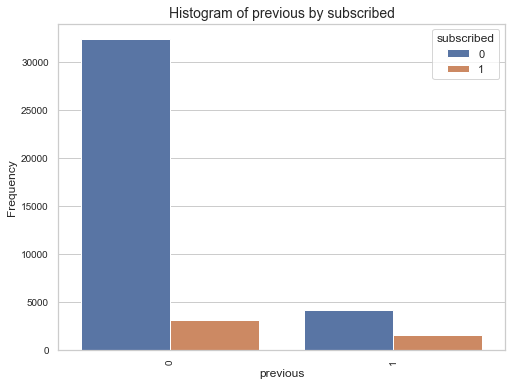

In [27]:
plot_histogram(data,'previous','subscribed')

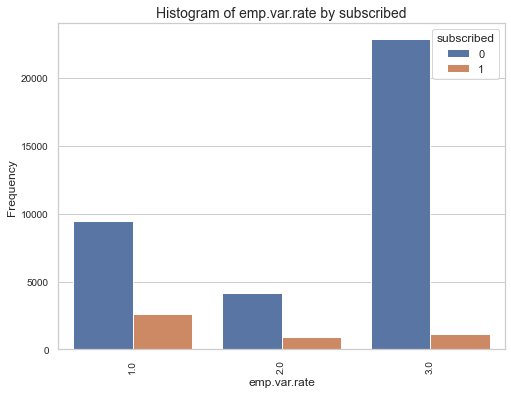

In [28]:
plot_histogram(data,'emp.var.rate','subscribed')

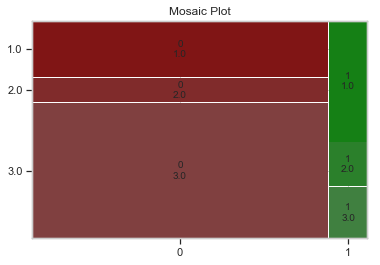

In [29]:
from statsmodels.graphics.mosaicplot import mosaic

# Create a mosaic plot
mosaic(data, ['subscribed', 'emp.var.rate'], title='Mosaic Plot')

# Display the plot
plt.show()

In [30]:
data.groupby('nr.employed').count()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,contacted_before,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,subscribed,year,date
nr.employed,,,,,,,,,,,,,,,,,,,,,
0,4964,4964,4964,4964,4964,4964,4964,4964,4964,4964,...,4964,4964,4964,4964,4964,4964,4964,4964,4964,4964
1,8544,8544,8544,8544,8544,8544,8544,8544,8544,8544,...,8544,8544,8544,8544,8544,8544,8544,8544,8544,8544
2,7763,7763,7763,7763,7763,7763,7763,7763,7763,7763,...,7763,7763,7763,7763,7763,7763,7763,7763,7763,7763
3,19914,19914,19914,19914,19914,19914,19914,19914,19914,19914,...,19914,19914,19914,19914,19914,19914,19914,19914,19914,19914


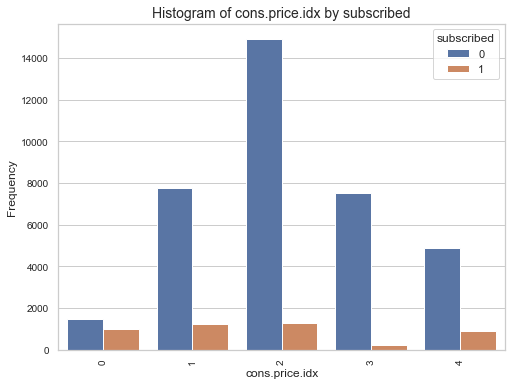

In [31]:
plot_histogram(data,'cons.price.idx','subscribed')

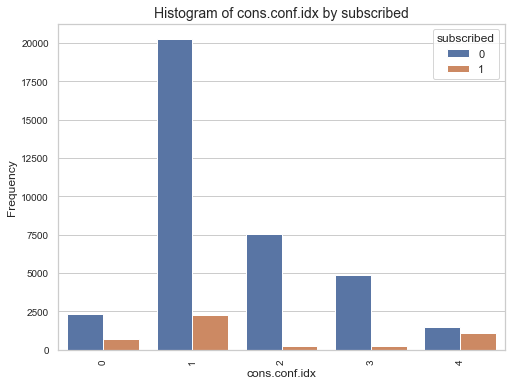

In [32]:
plot_histogram(data,'cons.conf.idx','subscribed')

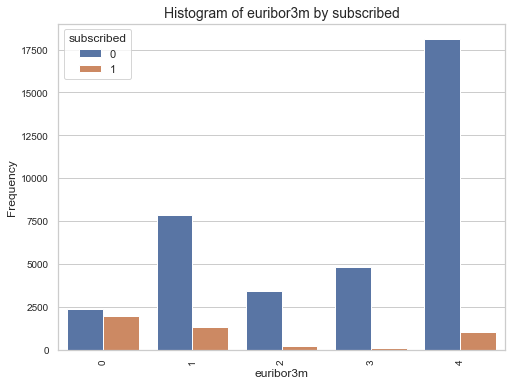

In [33]:
plot_histogram(data,'euribor3m','subscribed')

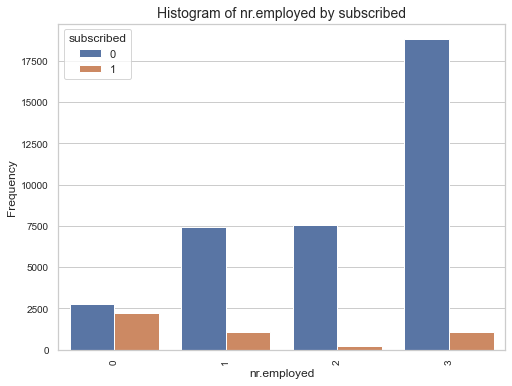

In [34]:
plot_histogram(data,'nr.employed','subscribed')

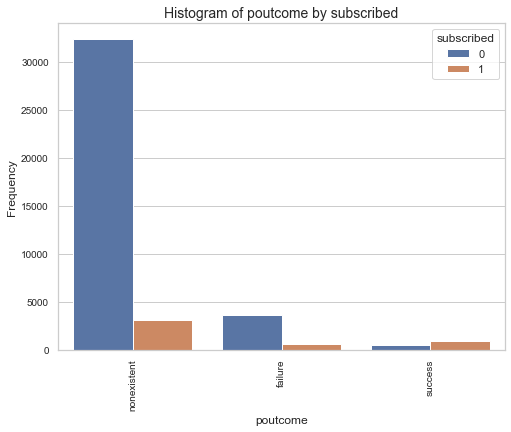

In [35]:
plot_histogram(data,'poutcome','subscribed')

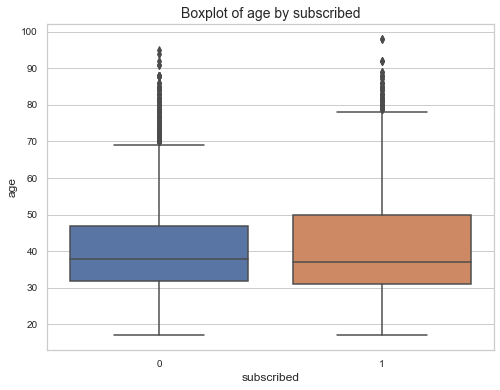

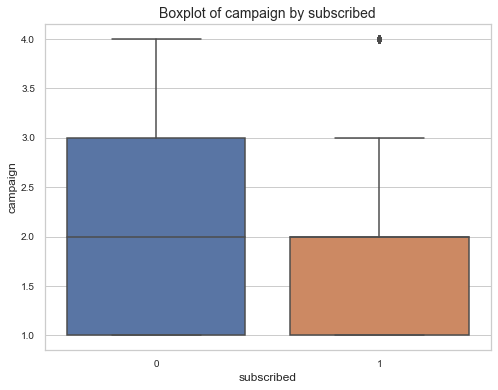

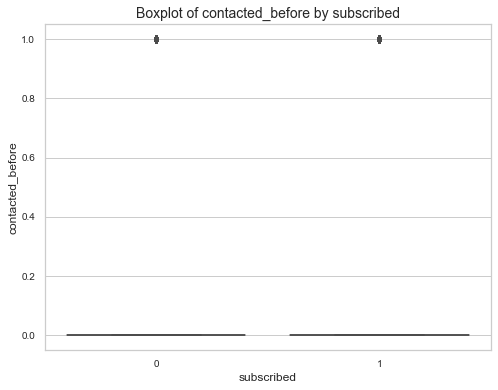

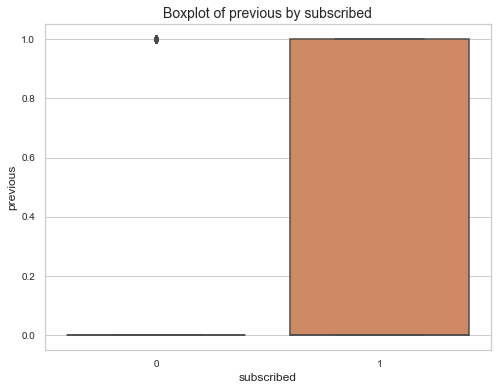

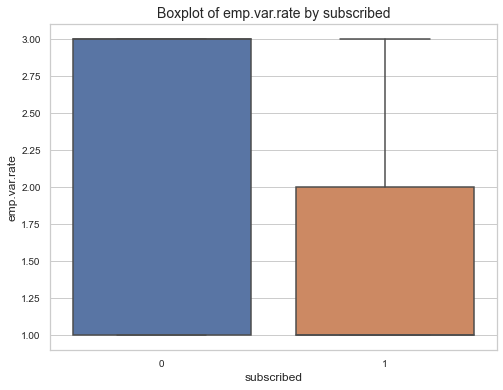

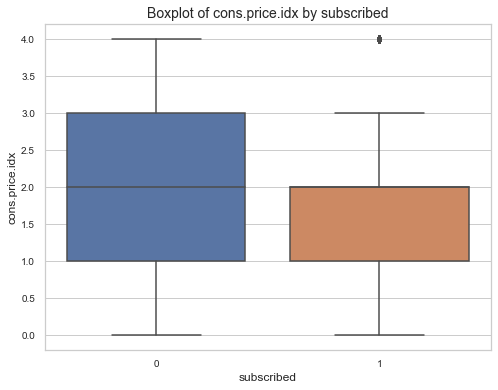

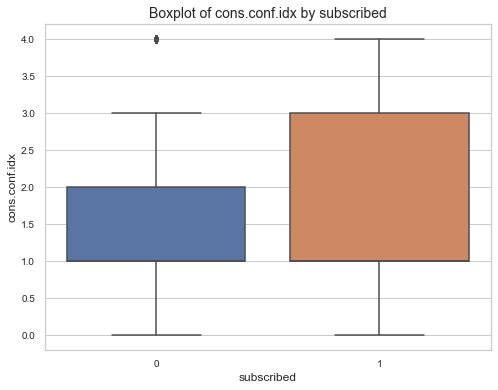

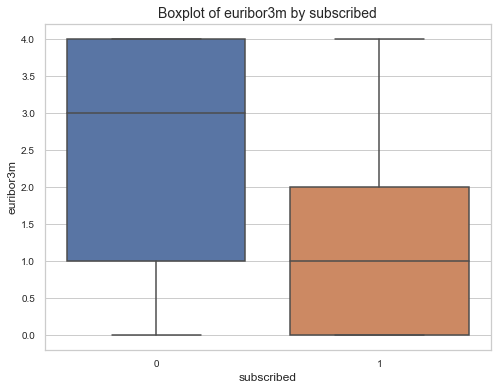

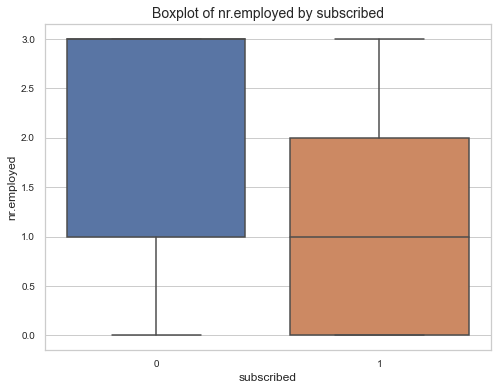

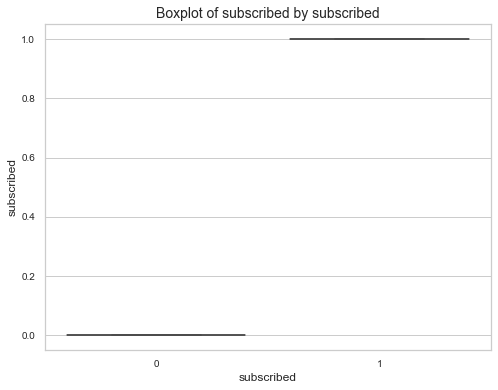

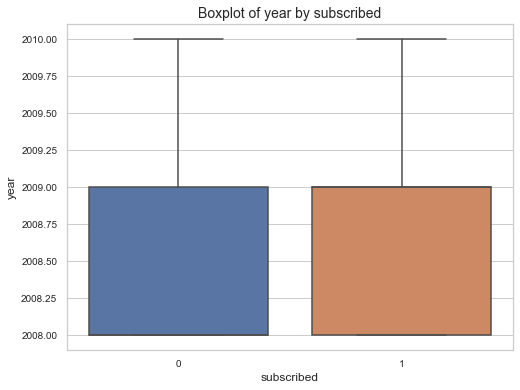

In [36]:
for column in numeric_df.columns:
    plot_boxplot(data, column, y='subscribed')

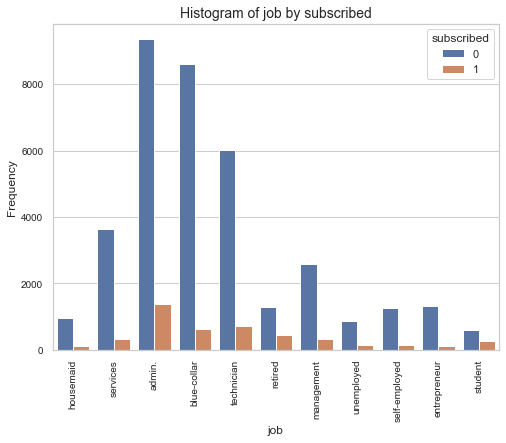

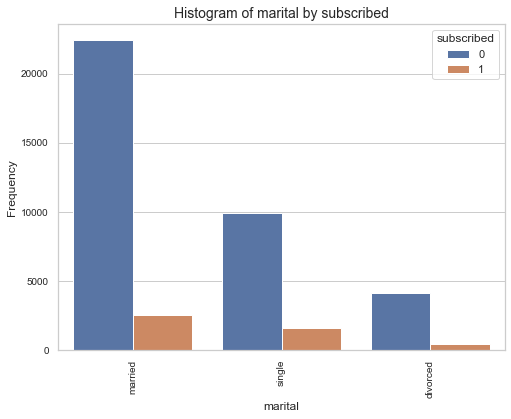

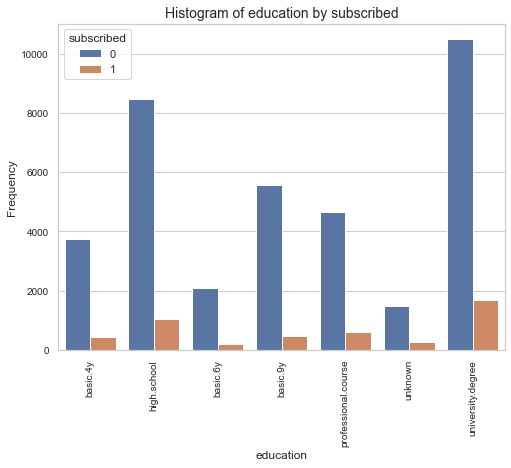

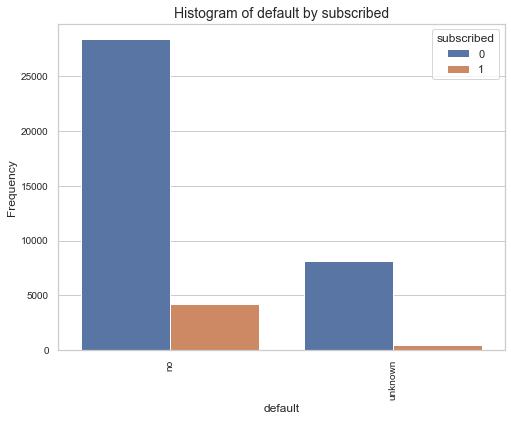

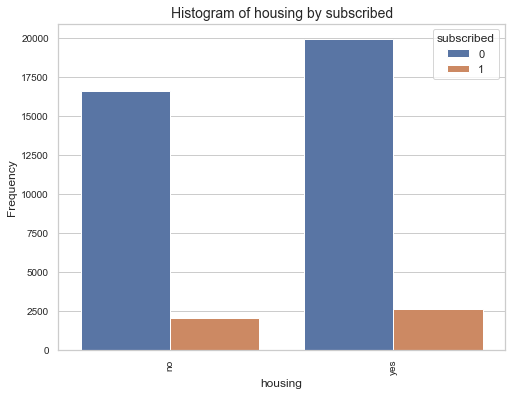

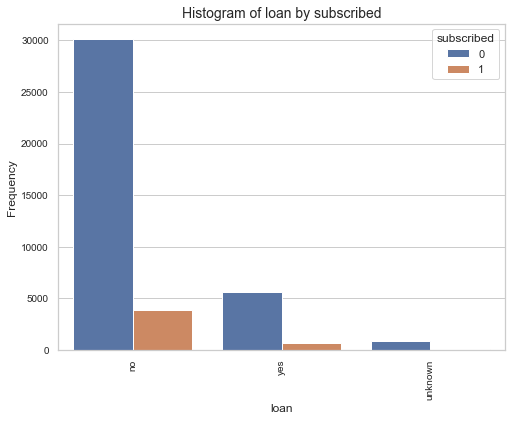

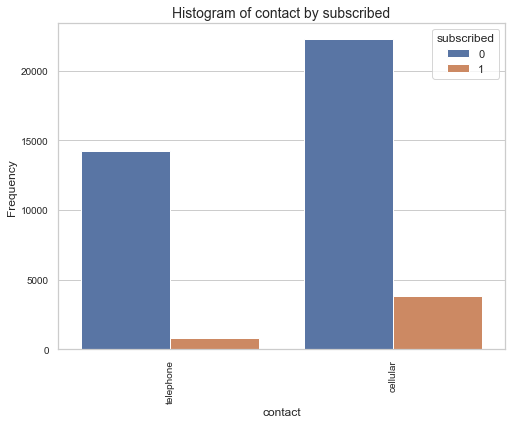

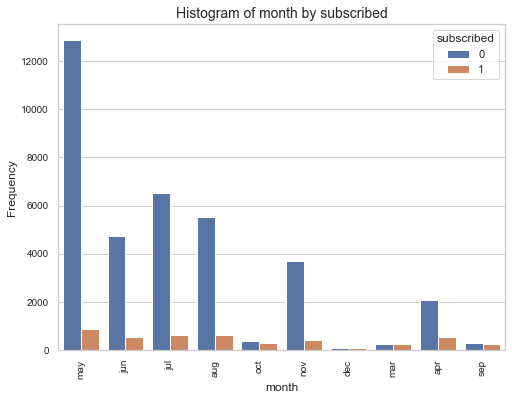

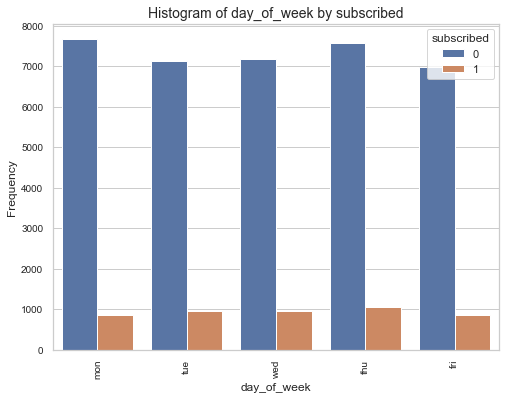

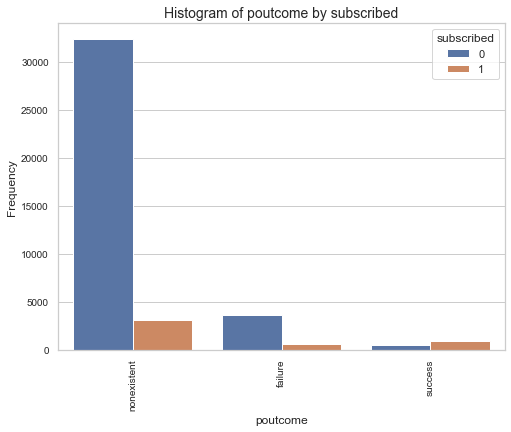

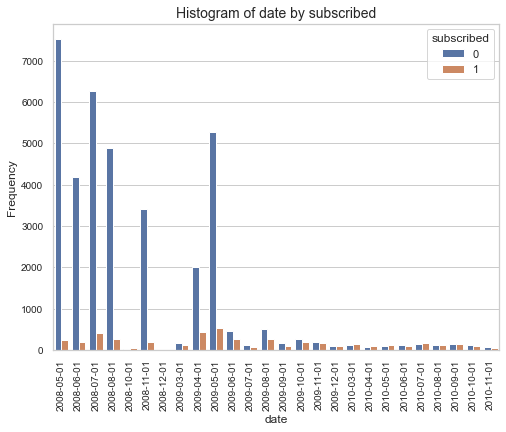

In [37]:
for column in categorical_df.columns:
    plot_histogram(data, column, y='subscribed')

<AxesSubplot:>

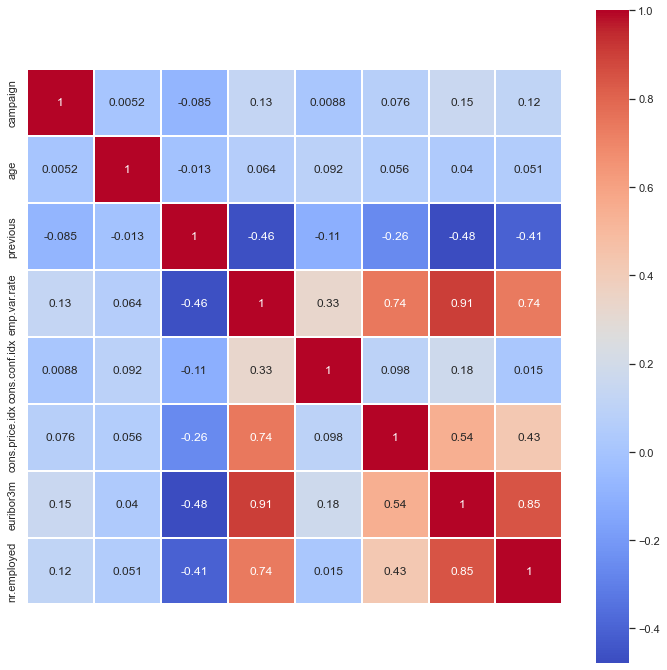

In [38]:
# Correlation

corr_matrix = data[['campaign', 'age','previous','emp.var.rate','cons.conf.idx','cons.price.idx','euribor3m','nr.employed']].corr(method='spearman')

fig, ax = plt.subplots(figsize=(12,12)) 
sns.heatmap(corr_matrix.astype(np.float64),annot=True,linewidths=.2,cmap='coolwarm',ax=ax,square=True,xticklabels='')

In [39]:
#Export model data

model_data = data.drop(labels=['year','date','day_of_week'],axis=1)

model_data.to_csv("./data/model_data.csv", index=False)